In [1]:
import pickle

In [3]:
train_path = 'batch_1/train_data.pickle'
test_path = 'batch_1/test_data.pickle'

with open(train_path, 'rb') as f:
    train_data = pickle.load(f)
    
with open(test_path, 'rb') as f:
    test_data = pickle.load(f)

In [4]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,label
0,0.579951,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.166770,0.0,0.0,...,0.747650,0.245581,0.030024,0.174167,0.540283,0.0,0.0,0.353232,0.0,1
1,0.578539,0.0,0.059236,0.000000,0.000000,0.0,0.0,0.199044,0.0,0.0,...,0.668872,0.162014,0.000000,0.127915,0.493748,0.0,0.0,0.275539,0.0,1
2,0.087414,0.0,0.695490,0.436274,0.000000,0.0,0.0,0.103897,0.0,0.0,...,0.492471,0.082775,0.000000,0.112004,0.438546,0.0,0.0,0.096754,0.0,0
3,0.329184,0.0,0.000000,0.029938,0.024057,0.0,0.0,0.036206,0.0,0.0,...,0.654933,0.337055,0.000000,0.000000,0.346229,0.0,0.0,0.317232,0.0,0
4,0.053473,0.0,0.000000,0.184720,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.732901,0.191005,0.000000,0.049176,0.545555,0.0,0.0,0.281541,0.0,0


In [5]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,label
0,0.353652,0.0,0.000000,0.305203,0.0377,0.0,0.0,0.000000,0.0,0.0,...,0.728745,0.127965,0.0,0.000000,0.303071,0.0,0.0,0.028939,0.0,0
1,0.695522,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.104255,0.0,0.0,...,0.730706,0.220946,0.0,0.016399,0.487663,0.0,0.0,0.354154,0.0,1
2,0.279904,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.160006,0.0,0.0,...,0.676915,0.199919,0.0,0.062777,0.000000,0.0,0.0,0.000000,0.0,0
3,0.098326,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.172469,0.0,0.0,...,0.945252,0.119779,0.0,0.021867,0.614726,0.0,0.0,0.154880,0.0,0
4,0.270445,0.0,0.769334,0.022462,0.0000,0.0,0.0,0.000000,0.0,0.0,...,0.538275,0.242577,0.0,0.014566,0.438992,0.0,0.0,0.191071,0.0,0


In [10]:
y_train = train_data.pop('label')
x_train = train_data

In [13]:
y_test = test_data.pop('label')
x_test = test_data

# Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, target_names = ['ALL','Hem']))

              precision    recall  f1-score   support

         ALL       0.78      0.97      0.86      1455
         Hem       0.86      0.41      0.55       678

    accuracy                           0.79      2133
   macro avg       0.82      0.69      0.71      2133
weighted avg       0.80      0.79      0.76      2133



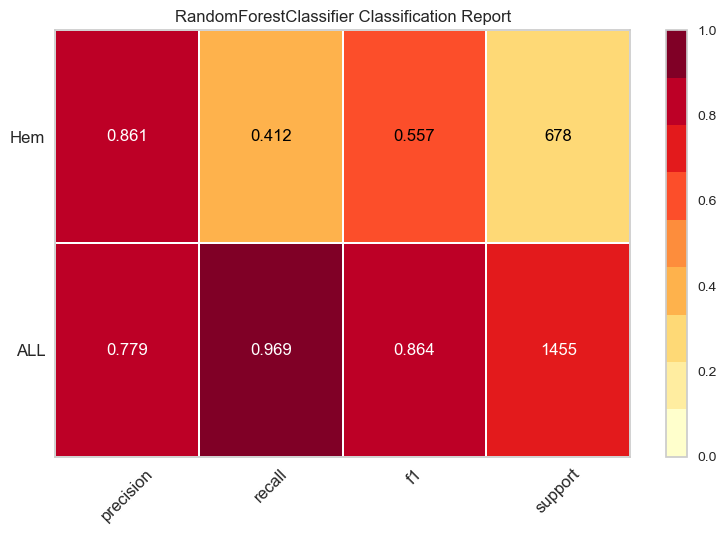

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [33]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

classes = ['ALL','Hem']
model = RandomForestClassifier()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(x_train, y_train)        # Fit the visualizer and the model
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

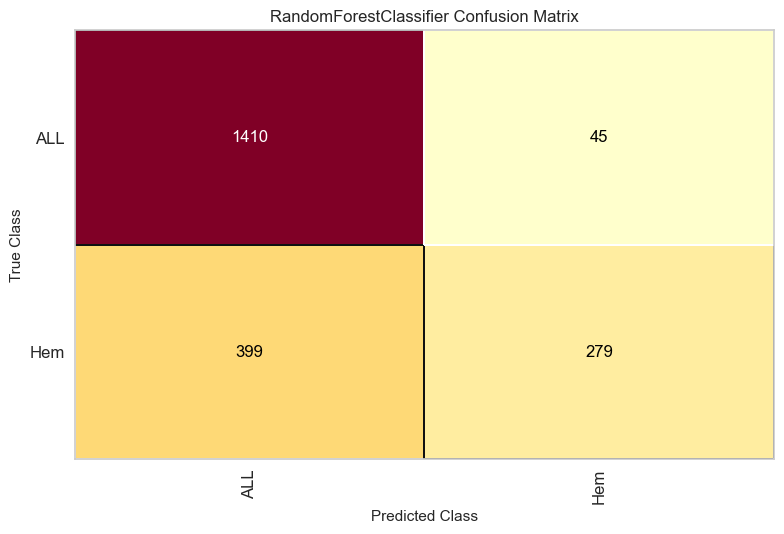

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [34]:
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=['ALL','Hem'])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_test, y_test)

# How did we do?
cm.show()

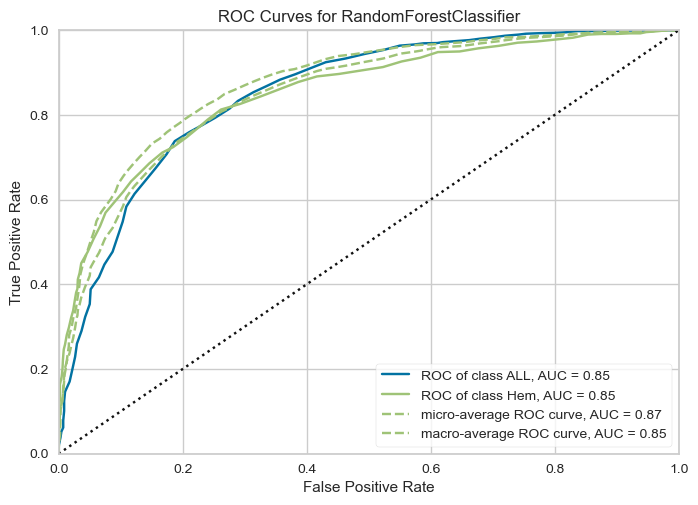

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [36]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model, classes=["ALL", "Hem"])

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

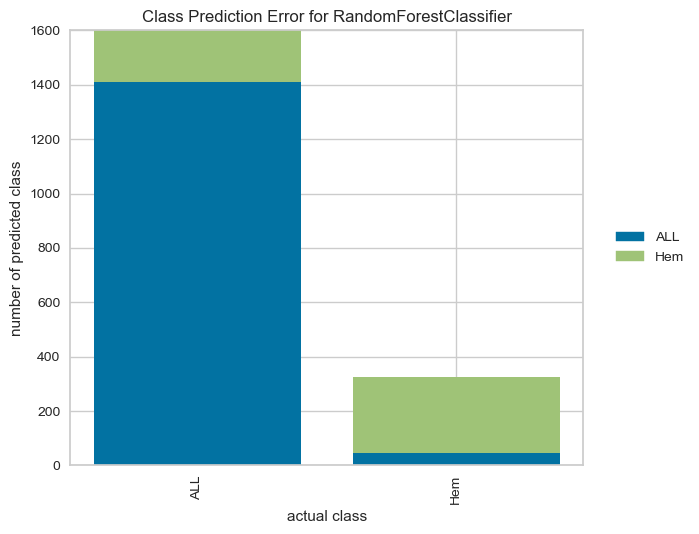

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [37]:
from yellowbrick.classifier import ClassPredictionError

classes = ['ALL','Hem']


# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
   model, classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(x_train, y_train)

# Evaluate the model on the test data
visualizer.score(x_test, y_test)

# Draw visualization
visualizer.show()